# Data Analyze

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import preprocessing
import numpy as np

In [2]:
churn = pd.read_csv('churn.csv')
commentInteractions = pd.read_csv('commentInteractions.csv')
votes = pd.read_csv('votes.csv')
comments_clean_anonimized = pd.read_csv('comments_clean_anonimized.csv')

/home/osboxes/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 1.1 Last participation date of employees

## The lastParticipationExists.csv file contains information about the date of the last interaction of an employee with the app.

    employee: An integer id that identifies an amployee inside a company. (negative = not in the company anymore)
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).
    numVotes: Total number of happyness votes emited by the user.
    lastParticipationDate: Date of the last interaction of the user with the app.
    stillExists: Boolean that is True if the user is still registered in the app.

In [3]:
churn

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True
...,...,...,...,...,...
4842,857,58a728a0e75bda00042a3468,1,Fri Mar 17 15:43:58 CET 2017,True
4843,858,58a728a0e75bda00042a3468,1,Fri Mar 17 17:00:00 CET 2017,True
4844,859,58a728a0e75bda00042a3468,1,Fri Mar 17 17:01:54 CET 2017,True
4845,17,573a0671b5ec330003add34a,7,Tue Jun 28 02:00:00 CEST 2016,True


In [40]:
churn.companyAlias.unique().shape

(37,)

<AxesSubplot:>

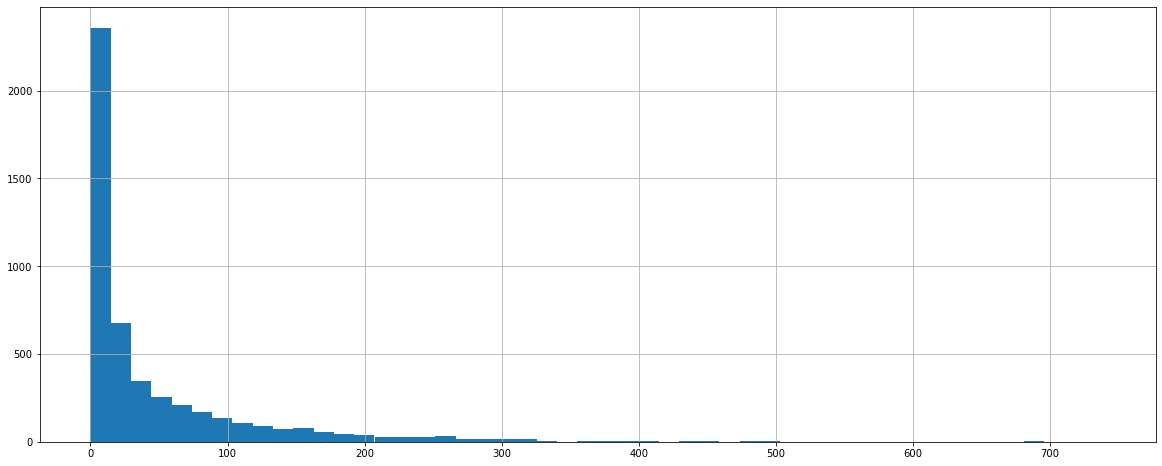

In [5]:
plt.figure(figsize=(20,8)) 
churn.numVotes.hist(bins = 50)

In [6]:
churn.lastParticipationDate = pd.to_datetime(churn.lastParticipationDate)
#pd.to_datetime(churn.lastParticipationDate).apply(lambda x: x.toordinal())

In [7]:
churn_2016 = churn[(churn['lastParticipationDate'] >= '2016-01-01') & (churn['lastParticipationDate'] < '2017-01-01')]

In [8]:
churn.lastParticipationDate.describe()

<ipython-input-8-4780018c3794>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  churn.lastParticipationDate.describe()


count                          4847
unique                         1844
top       2017-03-20 01:00:00+01:00
freq                            478
first     2014-06-07 02:00:00+02:00
last      2017-03-20 21:25:54+01:00
Name: lastParticipationDate, dtype: object

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   employee               4847 non-null   int64                    
 1   companyAlias           4847 non-null   object                   
 2   numVotes               4847 non-null   int64                    
 3   lastParticipationDate  4847 non-null   datetime64[ns, tzlocal()]
 4   stillExists            4847 non-null   bool                     
dtypes: bool(1), datetime64[ns, tzlocal()](1), int64(2), object(1)
memory usage: 156.3+ KB


<AxesSubplot:xlabel='lastParticipationDate', ylabel='numVotes'>

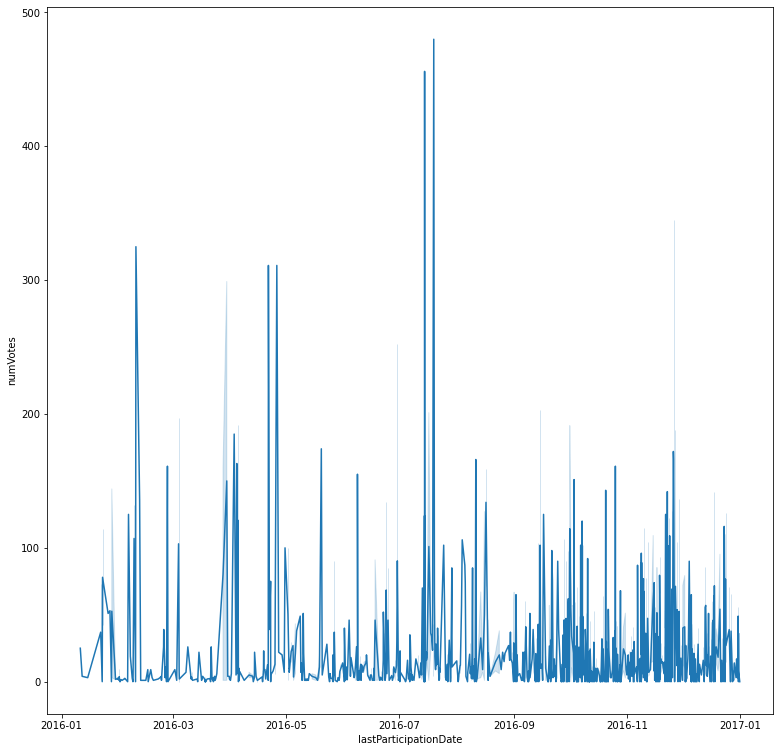

In [10]:
fig, ax = plt.subplots(figsize=(13,13))
sns.lineplot(data=churn_2016, x="lastParticipationDate", y="numVotes")

<AxesSubplot:xlabel='stillExists', ylabel='count'>

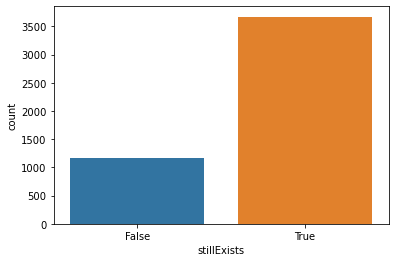

In [11]:
sns.countplot(x="stillExists", data=churn)

In [39]:
employee_still_exists = churn[(churn.stillExists == True) & (churn.employee > 0)]
employee_still_exists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3673 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   employee               3673 non-null   int64                    
 1   companyAlias           3673 non-null   object                   
 2   numVotes               3673 non-null   int64                    
 3   lastParticipationDate  3673 non-null   datetime64[ns, tzlocal()]
 4   stillExists            3673 non-null   bool                     
dtypes: bool(1), datetime64[ns, tzlocal()](1), int64(2), object(1)
memory usage: 147.1+ KB


In [13]:
employee_still_exists.numVotes.mean()

52.253199019874764

In [14]:
employee_doesnot_exists = churn[(churn.stillExists == False) & (churn.employee > 0)]
employee_doesnot_exists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 3 to 4730
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   employee               745 non-null    int64                    
 1   companyAlias           745 non-null    object                   
 2   numVotes               745 non-null    int64                    
 3   lastParticipationDate  745 non-null    datetime64[ns, tzlocal()]
 4   stillExists            745 non-null    bool                     
dtypes: bool(1), datetime64[ns, tzlocal()](1), int64(2), object(1)
memory usage: 29.8+ KB


In [15]:
employee_doesnot_exists.numVotes.mean()

40.98523489932886

<AxesSubplot:>

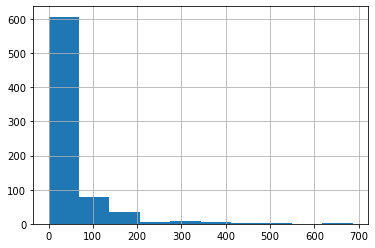

In [16]:
employee_doesnot_exists.numVotes.hist()

<AxesSubplot:>

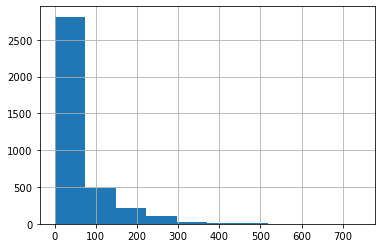

In [17]:
employee_still_exists.numVotes.hist()

In [18]:
to_transform = churn.groupby('companyAlias').mean().drop('employee', axis=1)
to_transform.head()

,numVotes,stillExists
companyAlias,,
5370af43e4b0cff95558c12a,18.857143,0.151786
53a2dd43e4b01cc02f1e9011,31.200000,0.880000
5474b9cde4b0bf7614b2c66f,4.600000,1.000000
54d43612e4b0f6a40755d93e,20.227273,0.636364
54e52607e4b01191dc064966,64.967047,0.376426


In [19]:
# à gérêr plus tard
x = to_transform[['numVotes']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [20]:
#df['stillExists'] = churn.stillExists.astype(int)
df['stillExists'] = to_transform.stillExists.values

In [21]:
df['companyAlias'] = to_transform.reset_index().companyAlias

In [22]:
df.columns = ['numVotes','stillExists','companyAlias']

<AxesSubplot:xlabel='numVotes', ylabel='stillExists'>

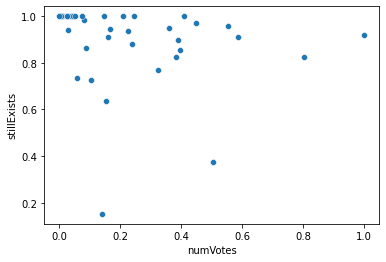

In [23]:
sns.scatterplot(data=df, x="numVotes", y="stillExists")

In [24]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   employee               4847 non-null   int64                    
 1   companyAlias           4847 non-null   object                   
 2   numVotes               4847 non-null   int64                    
 3   lastParticipationDate  4847 non-null   datetime64[ns, tzlocal()]
 4   stillExists            4847 non-null   bool                     
dtypes: bool(1), datetime64[ns, tzlocal()](1), int64(2), object(1)
memory usage: 156.3+ KB


In [25]:
churn.describe()

,employee,numVotes
count,4847.000000,4847.000000
mean,167.375490,45.896431
std,208.271041,71.302128
min,-218.000000,0.000000
25%,33.000000,3.000000
50%,113.000000,16.000000
75%,231.000000,59.000000
max,999.000000,740.000000


# 1.2 Employee Interactions

## The file commentInteractions.csv contains information about which employee liked or disliked a given comment.

    employee: An integer id that identifies an amployee inside a company.
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).

    commentId: A unique id for a given comment that allows us to relate it with the comments in anon_comments.csv.

    liked: A boolean that is True if the employee liked the comment.
    disliked: A boolean that is True if the employee disliked the comment.



In [26]:
commentInteractions

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,True,False,58d0179ae010990004e3806d
...,...,...,...,...,...
336955,-49,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834
336956,232,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834
336957,-25,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834
336958,36,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834


In [29]:
commentInteractions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336960 entries, 0 to 336959
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      336960 non-null  int64 
 1   companyAlias  336960 non-null  object
 2   liked         336959 non-null  object
 3   disliked      336959 non-null  object
 4   commentId     336959 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.9+ MB


In [50]:
commentInteractions = commentInteractions.dropna() #we only have one na row

In [43]:
commentInteractions.liked.sum() / commentInteractions.shape[0]

0.8440111585944919

In [45]:
commentInteractions.disliked.sum() / commentInteractions.shape[0]

0.15598587369420702

In [51]:
commentInteractions.liked = commentInteractions.liked.astype(int)
commentInteractions.disliked = commentInteractions.disliked.astype(int)

/home/osboxes/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [60]:
commentInteractions_grouped = commentInteractions.groupby('companyAlias').mean().drop('employee', axis = 1).reset_index()

In [83]:
sorted_commentInteractions = commentInteractions_grouped.sort_values(by=['liked'])

<AxesSubplot:xlabel='liked', ylabel='companyAlias'>

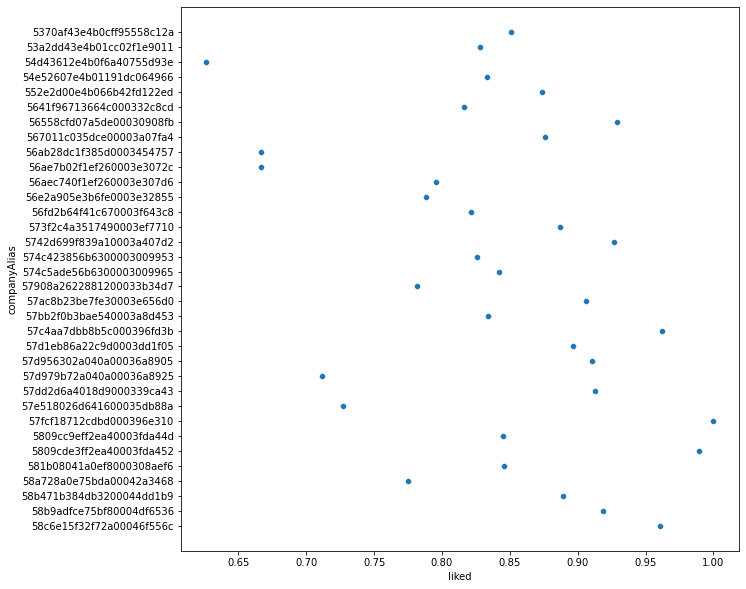

In [88]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=commentInteractions_grouped, x='liked', y='companyAlias', legend=False)

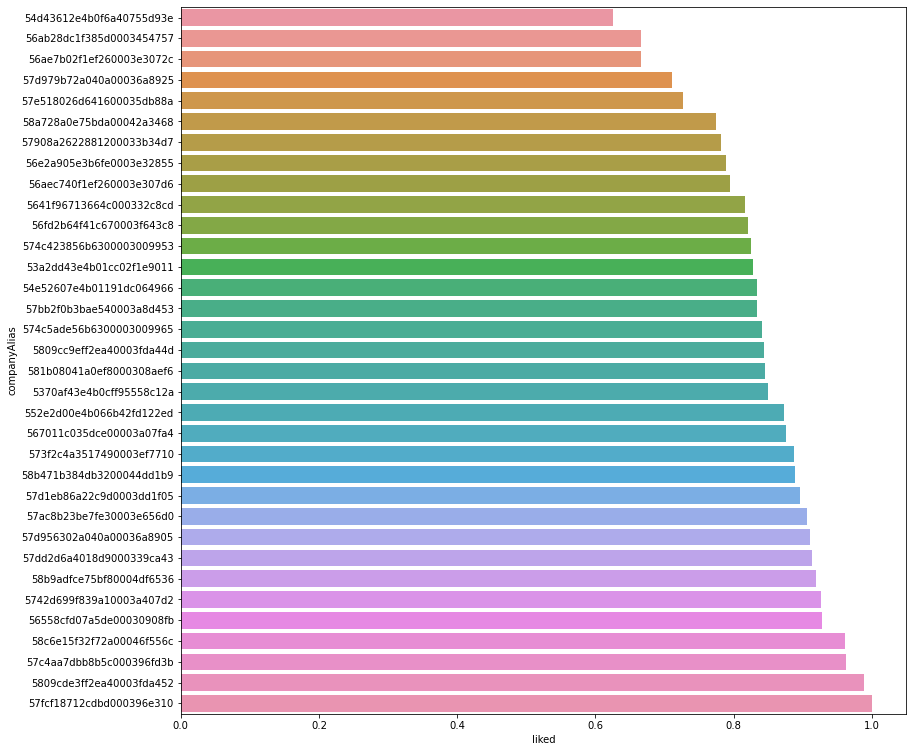

In [89]:
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.barplot(data=sorted_commentInteractions, x='liked', y='companyAlias')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [30]:
commentInteractions.describe()

,employee
count,336960.000000
mean,162.879475
std,182.069656
min,-218.000000
25%,38.000000
50%,122.000000
75%,212.000000
max,999.000000


# 1.3 Happyness votes data

## The data regarding the votes of the app users is stored in votes.csv. This file containg 4 different columns:

    employee: An integer id that identifies an amployee inside a company.
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).
    voteDate: String representing the date a given vote was emited.
    vote: The numeric value of the vote emited ranging from 1 to 4.



In [31]:
votes

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2
...,...,...,...,...
221227,17,573a0671b5ec330003add34a,Fri Jun 03 02:00:00 CEST 2016,3
221228,17,573a0671b5ec330003add34a,Tue Jun 07 02:00:00 CEST 2016,4
221229,17,573a0671b5ec330003add34a,Mon Jun 13 02:00:00 CEST 2016,4
221230,17,573a0671b5ec330003add34a,Tue Jun 28 02:00:00 CEST 2016,4


In [32]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221232 entries, 0 to 221231
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      221232 non-null  int64 
 1   companyAlias  221232 non-null  object
 2   voteDate      221232 non-null  object
 3   vote          221232 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.8+ MB


In [33]:
votes.describe()

,employee,vote
count,221232.000000,221232.000000
mean,172.119562,2.861530
std,172.723491,0.986078
min,1.000000,1.000000
25%,50.000000,2.000000
50%,127.000000,3.000000
75%,222.000000,4.000000
max,999.000000,4.000000


In [102]:
votes_by_company = votes.groupby('companyAlias').mean().drop('employee', axis = 1).reset_index().sort_values(by=['vote'])

In [99]:
votes_by_company.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   companyAlias  37 non-null     object 
 1   vote          37 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


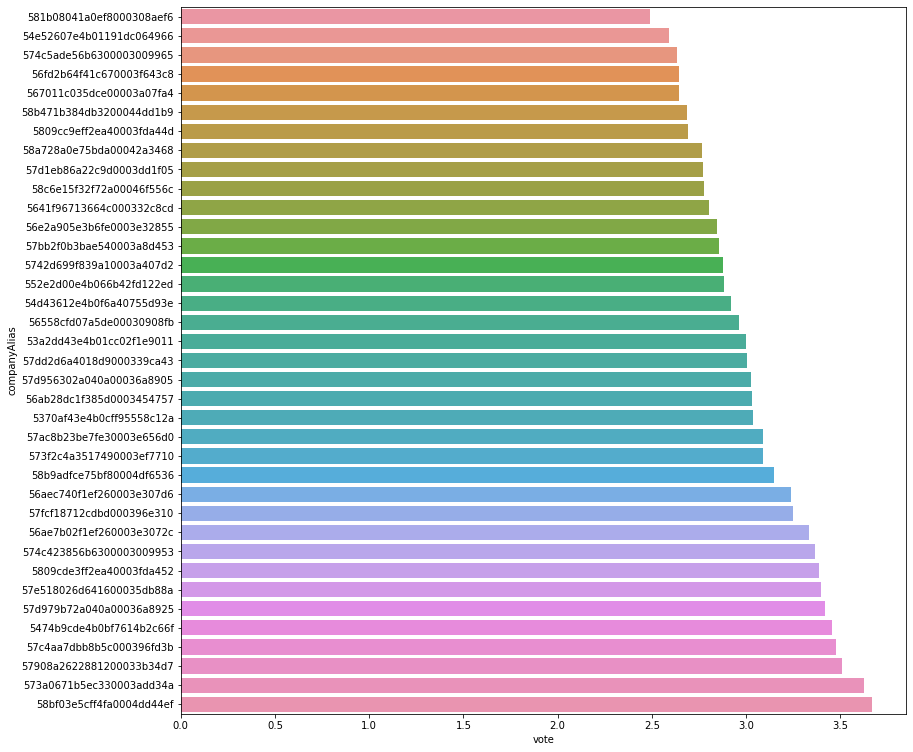

In [103]:
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.barplot(data=votes_by_company, y='companyAlias', x='vote')

# 1.4 Comments data

## It is possible to find data about the comments written in the app in the anon_comments.csv file, and it has the following structure:

    employee: An integer id that identifies an amployee inside a company.
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).
    commentDate: String representing the date a given comment was written.
    commentId: A unique id for a given comment.
    comment: Anonimized comment. It has the same length as the original comment.
    likes: Number of likes that the comment received.
    dislikes: Number of dislikes that the comment received.



In [34]:
comments_clean_anonimized

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017
...,...,...,...,...,...,...,...
82751,118,58a728a0e75bda00042a3468,58ae85a69fd38f00045eeee4,**********************************************...,1.0,0.0,Thu Feb 23 07:44:48 CET 2017
82752,-10,58a728a0e75bda00042a3468,58ae7fa19fd38f00045eeee2,*****************,2.0,0.0,Thu Feb 23 07:22:12 CET 2017
82753,-8,58a728a0e75bda00042a3468,58adbfcbb8242400048bf8c1,**********************,5.0,0.0,Wed Feb 22 17:43:39 CET 2017
82754,64,58a728a0e75bda00042a3468,58adba78b8242400048bf8b5,**********************************,3.0,0.0,Wed Feb 22 17:20:07 CET 2017


In [108]:
comments_clean_anonimized['txt_len'] = comments_clean_anonimized.txt.str.len()

In [109]:
comments_clean_anonimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82756 entries, 0 to 82755
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   employee      82756 non-null  int64  
 1   companyAlias  82756 non-null  object 
 2   commentId     82756 non-null  object 
 3   txt           82539 non-null  object 
 4   likes         82755 non-null  float64
 5   dislikes      82755 non-null  float64
 6   commentDate   82755 non-null  object 
 7   txt_len       82539 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.1+ MB


In [36]:
comments_clean_anonimized.describe()

,employee,likes,dislikes
count,82756.000000,82755.000000,82755.000000
mean,135.108427,6.873107,1.270534
std,161.530227,7.704659,2.715937
min,-217.000000,0.000000,0.000000
25%,29.000000,2.000000,0.000000
50%,102.000000,4.000000,0.000000
75%,197.000000,9.000000,1.000000
max,999.000000,86.000000,53.000000


In [112]:
comments_clean_anonimized.likes.sum()

568784.0

In [113]:
comments_clean_anonimized.dislikes.sum()

105143.0

In [123]:
comments_grouped = comments_clean_anonimized.groupby('companyAlias').mean().drop('employee', axis = 1).sort_values(by=['likes'], ascending = False)
comments_grouped.head()

,likes,dislikes,txt_len
companyAlias,,,
5742d699f839a10003a407d2,14.270910,1.126203,198.588497
5641f96713664c000332c8cd,12.640990,2.844197,140.652933
574c5ade56b6300003009965,10.133936,1.902629,126.624486
58a728a0e75bda00042a3468,9.793769,2.849057,97.008776
57d956302a040a00036a8905,9.160800,0.902400,105.902400


<AxesSubplot:xlabel='txt_len', ylabel='likes'>

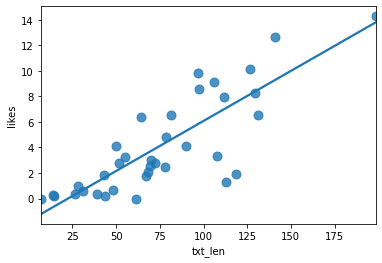

In [153]:
sns.regplot(data=comments_grouped, x="txt_len", y="likes",  scatter_kws={"s": 80}, ci=None, robust=True)

<AxesSubplot:xlabel='txt_len', ylabel='dislikes'>

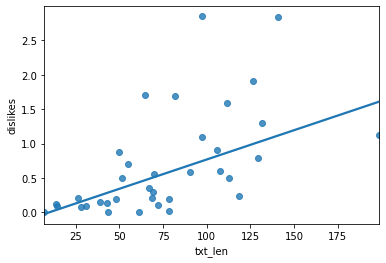

In [156]:
sns.regplot(data=comments_grouped, x="txt_len", y="dislikes", robust= True, ci=None)